<a href="https://colab.research.google.com/github/jayadithya-g7/MLT-LAB-College/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-5 MLT Lab

Jayadithya G

23011103019

<b> Apply Linear Regression on the attached data and demonstrate R^2 with plot of the fit. </b>


import necessary packages and modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
# Load the dataset
file_path = "/content/california_housing.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

**</b>Drop the ocean_proximity categorical feature</b>**


In [3]:
# Drop the 'ocean_proximity' categorical feature
data = data.drop(columns=['ocean_proximity'], errors='ignore')

**<b>How many columns are there with NaN values? Apply SimpleImputer on them with mean strategy.</b>**



In [4]:
# Count the number of columns with NaN values
nan_columns = data.columns[data.isnull().any()]
print(f"Columns with NaN values: {len(nan_columns)}")

Columns with NaN values: 1


In [5]:
print(f"Column with NaN values: {(nan_columns)}")

Column with NaN values: Index(['total_bedrooms'], dtype='object')


In [6]:
# Apply SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')
data[nan_columns] = imputer.fit_transform(data[nan_columns])

**<BR>Print first, second and third quartile data for all features , use describe command if required. <BR>**



In [7]:
# Print the first, second, and third quartiles of all features
print("\nQuartile data for all features:")
print(data.describe())


Quartile data for all features:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000      

In [8]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['median_house_value'])  # Replace 'median_house_value' with the target column name
y = data['median_house_value']

**<br>Do a train test split of 70:30 and 80:20 ratio.<br>**

**<br>Apply linear regression<br>**

In [9]:
# Train-test split: 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Train-test split: 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model for 70:30 split
model_70 = LinearRegression()
model_70.fit(X_train_70, y_train_70)
y_pred_70 = model_70.predict(X_test_70)
r2_70 = r2_score(y_test_70, y_pred_70)
print(f"\nR^2 score for 70:30 split: {r2_70:.4f}")

# Create and train the linear regression model for 80:20 split
model_80 = LinearRegression()
model_80.fit(X_train_80, y_train_80)
y_pred_80 = model_80.predict(X_test_80)
r2_80 = r2_score(y_test_80, y_pred_80)
print(f"R^2 score for 80:20 split: {r2_80:.4f}")


R^2 score for 70:30 split: 0.6303
R^2 score for 80:20 split: 0.6144


**<br>Create a scatter plot of actual vs. predicted values<br>**

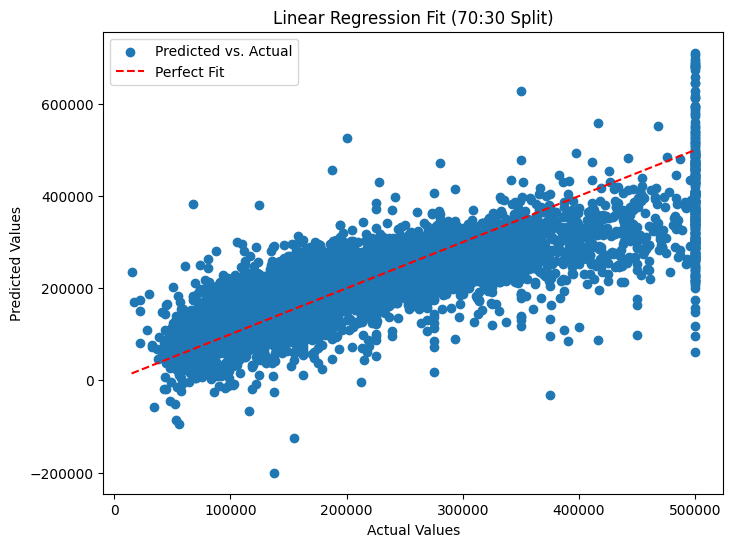

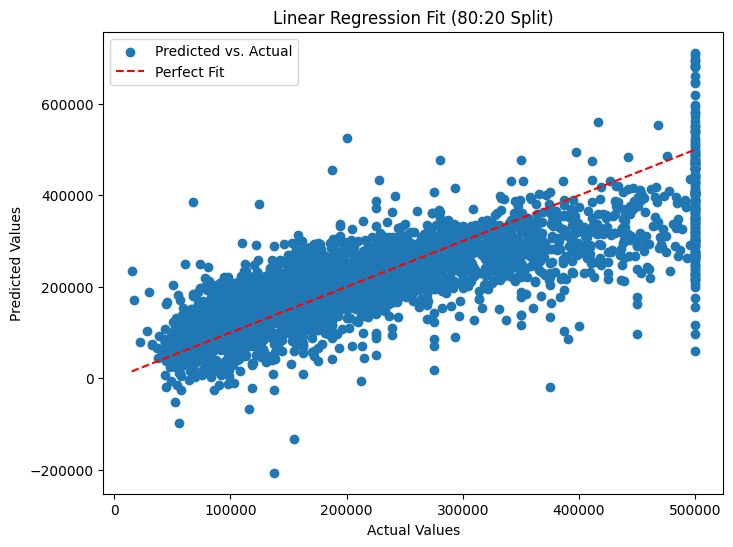

In [10]:
# Plot the fit for 70:30 split
plt.figure(figsize=(8, 6))
plt.scatter(y_test_70, y_pred_70, label='Predicted vs. Actual')
plt.plot([min(y_test_70), max(y_test_70)], [min(y_test_70), max(y_test_70)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Linear Regression Fit (70:30 Split)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Plot the fit for 80:20 split
plt.figure(figsize=(8, 6))
plt.scatter(y_test_80, y_pred_80, label='Predicted vs. Actual')
plt.plot([min(y_test_80), max(y_test_80)], [min(y_test_80), max(y_test_80)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Linear Regression Fit (80:20 Split)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()